In [1]:
# Import Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [2]:
# Load Data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")


In [3]:
# Preprocess Data
merged = transactions.merge(customers, on='CustomerID')
customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [4]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features.iloc[:, 1:])


In [5]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(normalized_features)
customer_features['Cluster'] = clusters

In [6]:
# Evaluate Clustering
db_index = davies_bouldin_score(normalized_features, clusters)
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.72127971818163


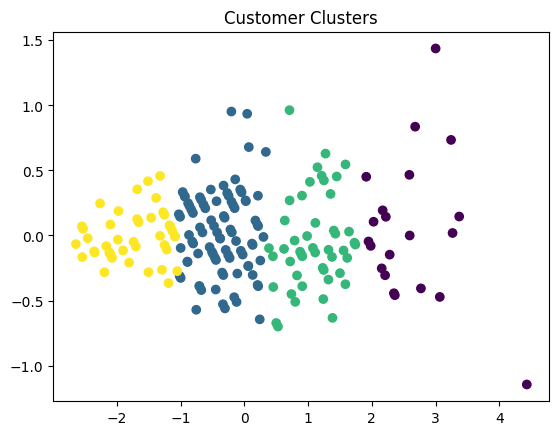

In [7]:
# Visualize Clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_features)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters')
plt.show()